# Analyza axialni pozice iontu

jak ovlivnuje posun axialni elektrody el. pole generovane touto elektrodou?

In [2]:
# import jednotlivych osovych poli z comsolu
# 13 - par rad. el. y
# 24 - par rad. el. x
# 5 - axialni elektroda z-
# 6 - axialni elektroda z+

# ze symetrie: E_13 = E_24
#              E_5(z) = - E_6(-z)

using DelimitedFiles

## nacteni dat ze souboru
# pole generovano axialni elektrodou v + 2.25mm
z_data = readdlm("axial_E_field_unitary_ax_pos_shift_delim.txt")[:,2]
E_field_ax_pos_shift_data = -readdlm("axial_E_field_unitary_ax_pos_shift_delim.txt")[:,3:2:end]
z_ax_pos = [2.25, 2.3, 2.35, 2.4]

# original data
E_field_ax_data_orig = readdlm("axial_field_unitary_rad_ax_delim.txt")[:,3]

leng_data = length(z_data)
# nyni mam nacteny data ve stejnych bodech


50000

In [6]:
# import packagu pro ploceni
using PyPlot
using PyCall
using LaTeXStrings
using Formatting

# latex fonty
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "false";

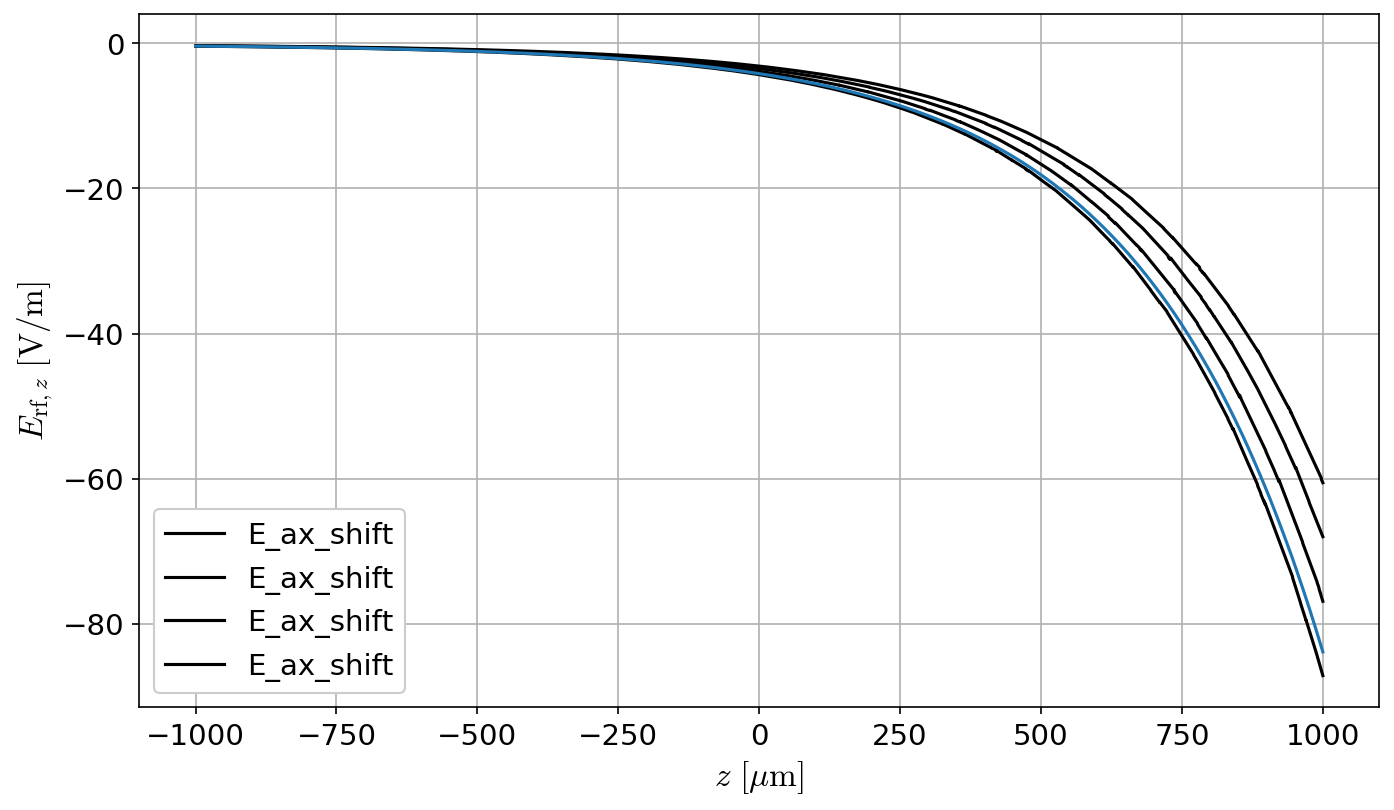

PyObject <matplotlib.legend.Legend object at 0x7f894d00db50>

In [4]:
#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz
figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

#line1 = x.plot(z_data[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
#    E_rf_amp[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")


#line1 = x.plot(z_data[convert(Int64,round(1*leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
#    E_field_ax_pos_shift_data[convert(Int64,round(1*leng_data/4)):convert(Int64,round(3*leng_data/4)),:], color="black", label="E_ax")
line1 = x.plot(z_data*1e3,E_field_ax_pos_shift_data, color="black", label="E_ax_shift")
line2 = x.plot(z_data*1e3, E_field_ax_data_orig)

x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
x.set_ylabel(L"E_{\rm{rf},\it{z}} \, \, \rm{[V/m]}", fontsize=16)

x.grid()
x.legend(framealpha=1)

In [5]:
# definuju interpolacni fce

py"""
from scipy import interpolate

def pyinterp(z, E_field_data):
    return interpolate.interp1d(z, E_field_data, kind='quadratic')

"""
E_field_ax_orig = py"pyinterp"(z_data*1e3, E_field_ax_data_orig)
E_field_ax_24 = py"pyinterp"(z_data*1e3, E_field_ax_pos_shift_data[:,end])
E_field_ax_235 = py"pyinterp"(z_data*1e3, E_field_ax_pos_shift_data[:,3])

PyObject <scipy.interpolate.interpolate.interp1d object at 0x7f8945c05470>

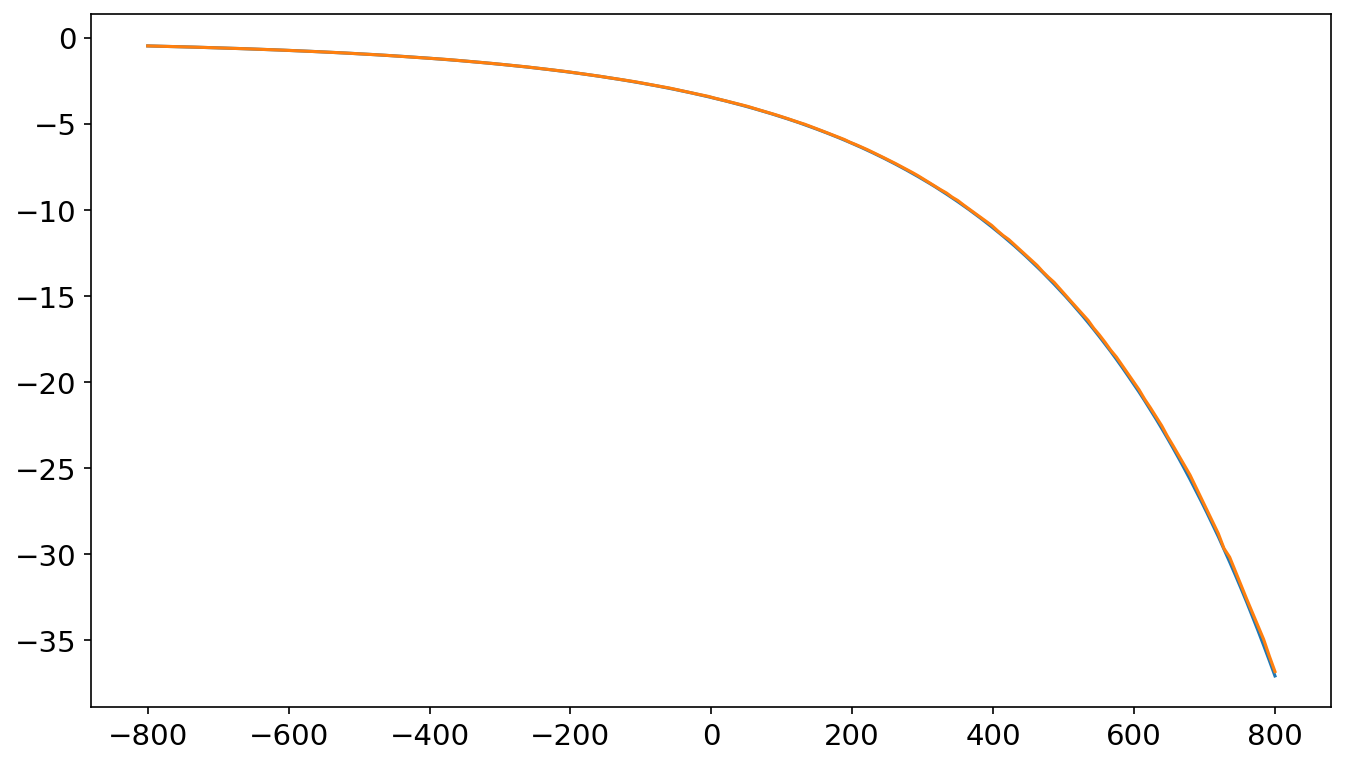

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8945a94950>

In [7]:
z_zoom = range(-800, 800, length=200)

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
#plot(z_zoom, E_field_ax_orig(z_zoom.-103) )
plot(z_zoom, E_field_ax_orig(z_zoom.-65) )
#plot(z_zoom, E_field_ax_24(z_zoom) )
plot(z_zoom, E_field_ax_235(z_zoom) )

Zda se, ze staci originalni fci posunout o urcitou hodnotu z. Nyni jdu zjistit, jak tento posun zavisi na poloze elektrody.

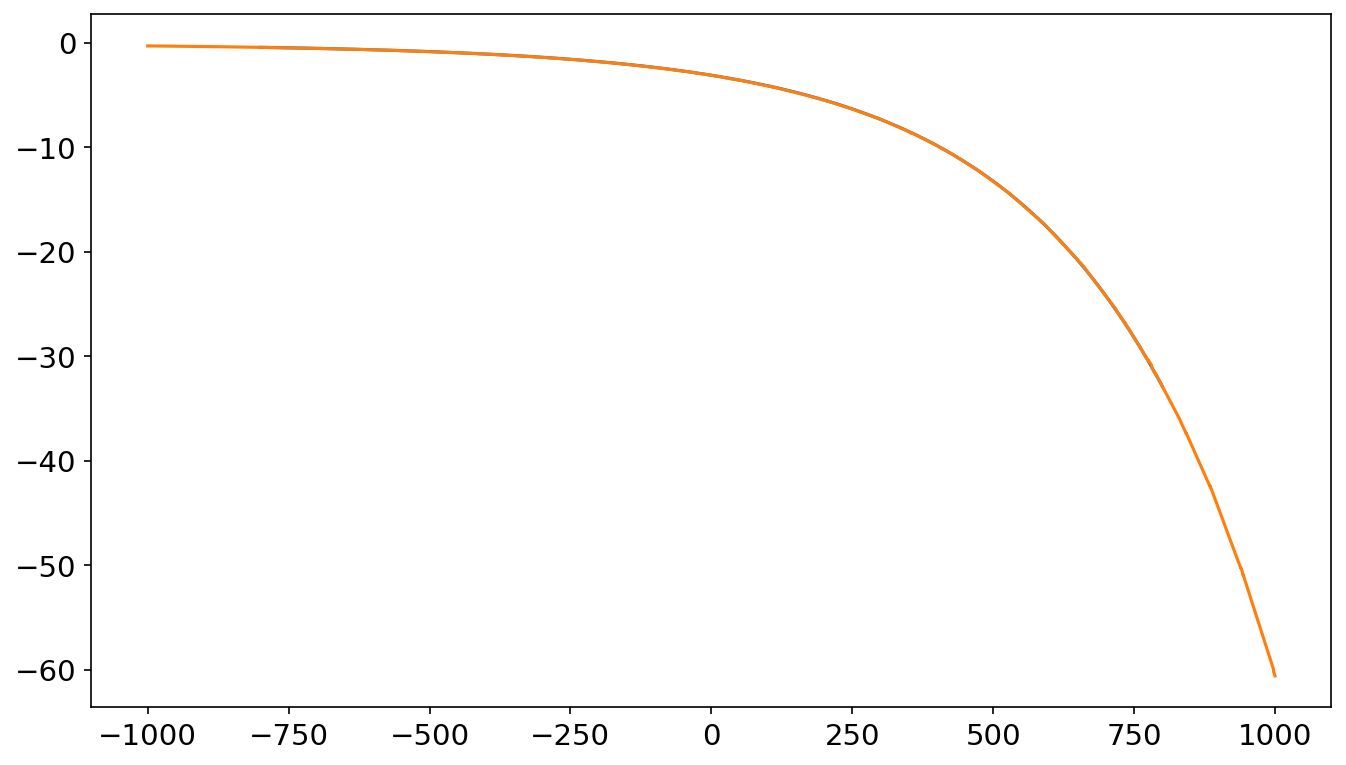

[104.30941310828226]

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8945a19190>

In [8]:
## fit
using LsqFit
#import Pkg; Pkg.add("LsqFit")
# model
model(z, p) = E_field_ax_orig(z.-p[1])

p0 = [20.0]

fit = curve_fit(model, z_data[4000:end-4000]*1e3, E_field_ax_pos_shift_data[4000:end-4000,end], p0)
param = fit.param
print(param)

# # fit curve
z_fit = range(-800, 800, length=200)
E_fit = model(z_fit, param);

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
#plot(z_zoom, E_field_ax_orig(z_zoom.-103) )
plot(z_fit, E_fit )
plot(z_data*1e3, E_field_ax_pos_shift_data[:,end])

ok, asi funguje

In [9]:
params = zeros(length(z_ax_pos))
for i in 1:length(z_ax_pos)
    

    p0 = [20.0]

    fit = curve_fit(model, z_data[4000:end-4000]*1e3, E_field_ax_pos_shift_data[4000:end-4000,i], p0)
    params[i] = fit.param[1]
end

zavislost posunu orig. fce na poloze axialni elektrody

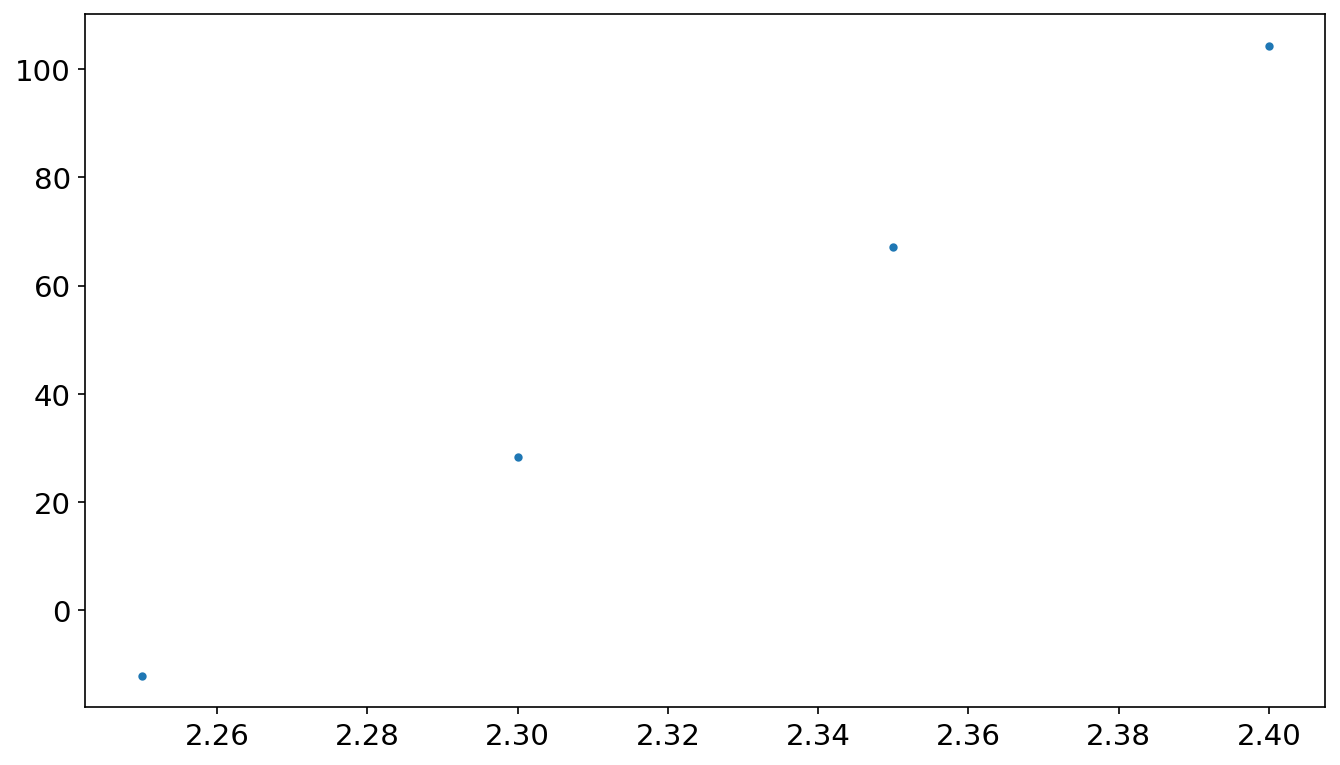

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f894530db10>

In [10]:
figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

plot(z_ax_pos, params, ".")


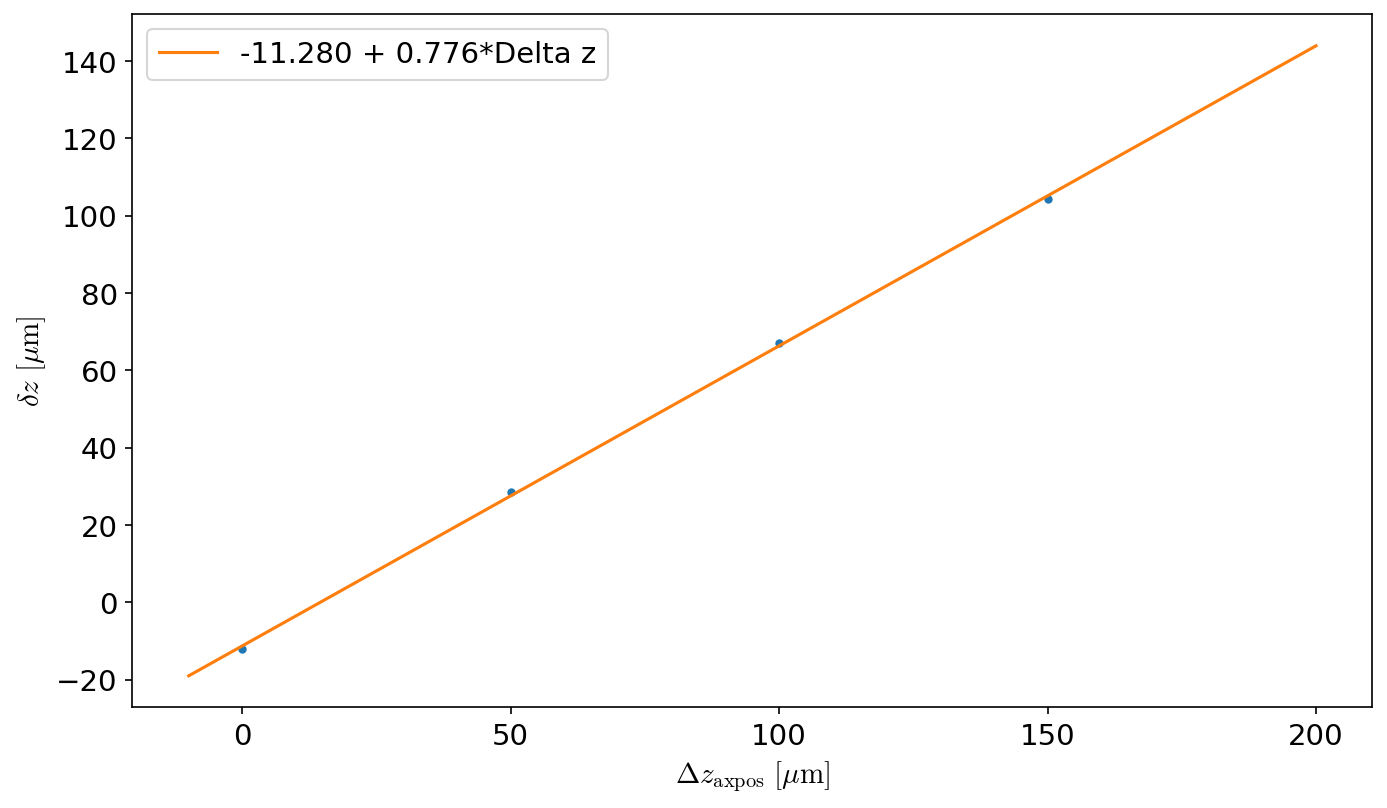

[-11.280478419154617, 0.775928408051488]

PyObject <matplotlib.legend.Legend object at 0x7f89452ec4d0>

In [11]:
## fit
using LsqFit
#import Pkg; Pkg.add("LsqFit")
# model
model(z, p) = p[1] .+ p[2].*z

p0 = [-1000.0, 200.0]

fit = curve_fit(model, (z_ax_pos.-2.25)*1e3, params, p0)
param = fit.param
print(param)


z_ax_pos_fit = range(2.24,2.45, length=200)
params_fit = model((z_ax_pos_fit.-2.25)*1e3, param)

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

plot( (z_ax_pos.-2.25)*1e3, params, ".")
plot( (z_ax_pos_fit.-2.25)*1e3, params_fit, label=format("{:.3f} + {:.3f}*Delta z",param[1], param[2]))
xlabel(L"$\Delta z_{\rm axpos} \,\, \rm [\mu m]$")
ylabel(L"$\delta z \,\, \rm [\mu m]$")
legend()

# Poloha zachyceni iontu

Zkusim si najit stabilni polohy iontu v zavislosti na posunu axialnich elektrod

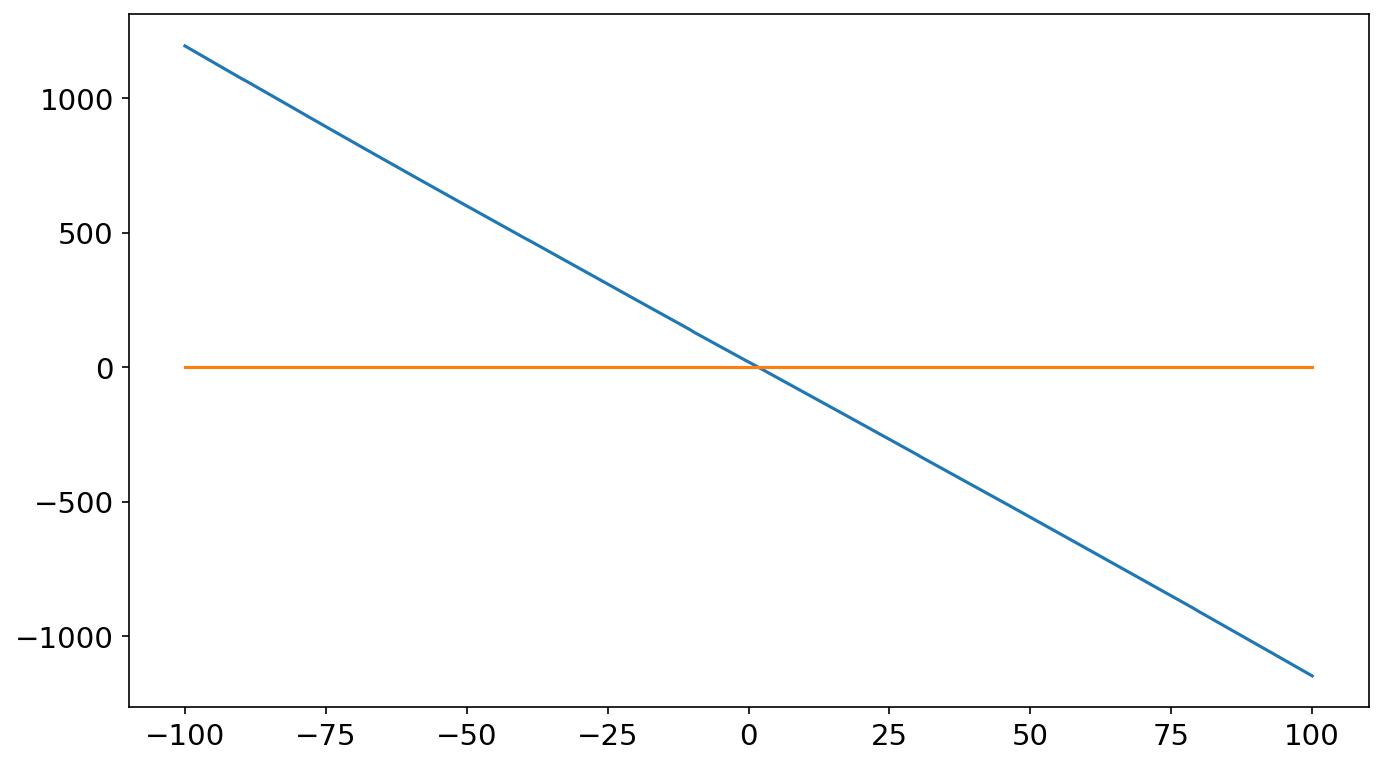

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f894529db50>

In [12]:
# el. pole generovane protejsimi axialnimi elektrodami
U_dc_5 = 425
U_dc_6 = 575

# osa z
z_zoom = range(-100, 100, length=200)

E_field_ax_dc = U_dc_5 * (-1*E_field_ax_orig(-z_zoom.+50)) + U_dc_6 * E_field_ax_orig(z_zoom.-60)

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plot(z_zoom, E_field_ax_dc)
plot(z_zoom, zeros(length(z_zoom)))

Zde vidime, ze posunem axialnich elektrod o cca 75 um jsme schopni dosahnout toho, co pozorujeme v realnem pripade, tedy, ze je iont zachyceny cca ve stredu radialnich elektrod pro napeti 575 a 425.

## Vypocet parametru z_0

Mel by fungovat odhad, ze

\begin{equation}
    \frac{\kappa}{z_0^2} = - \frac{1}{2} \frac{\rm d \it E_z}{\rm d \it z}
\end{equation}

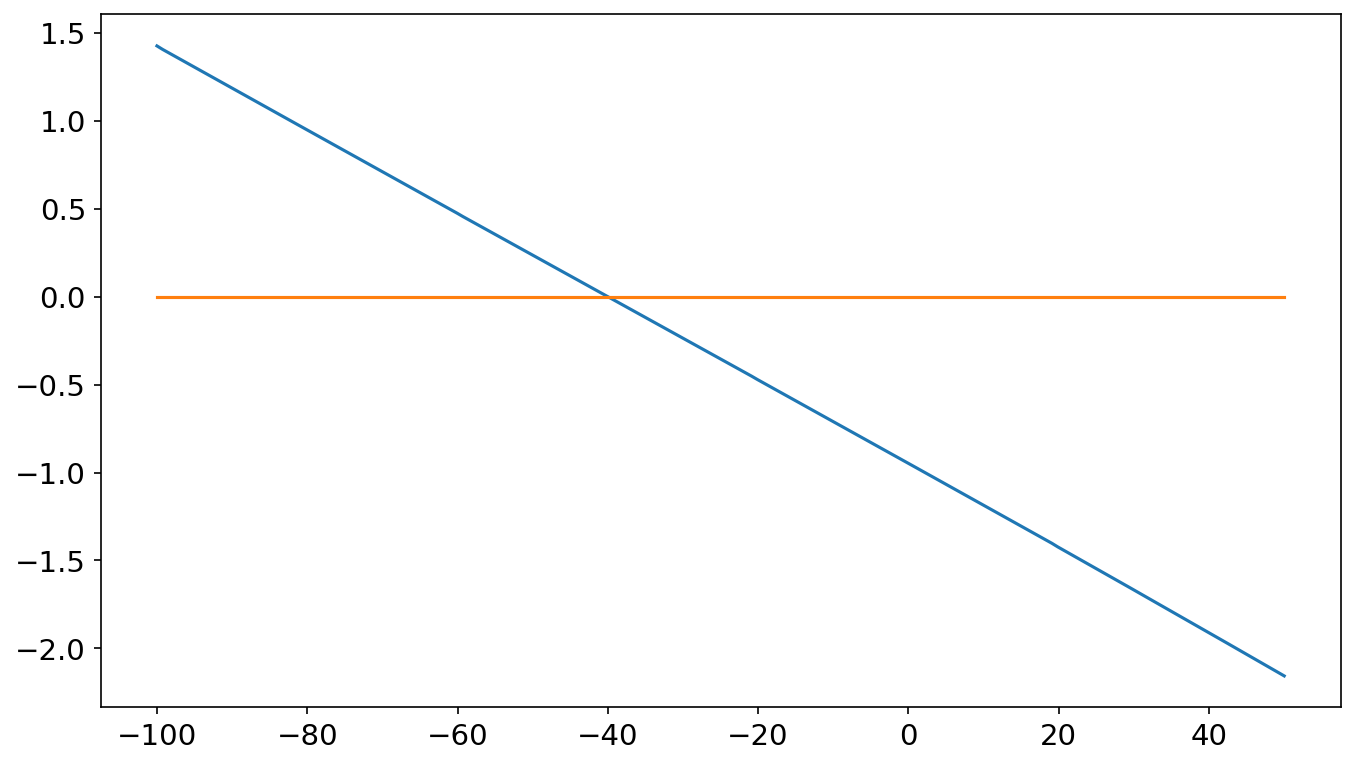

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f89440b2e10>

In [76]:
# el. pole generovane protejsimi axialnimi elektrodami
U_dc_5 = 1
U_dc_6 = 1

# osa z
z_zoom = range(-100, 50, length=200)

E_field_ax_dc = U_dc_5 * (-1*E_field_ax_orig(-(z_zoom.+40)) ) + U_dc_6 * E_field_ax_orig(z_zoom.+40)
#E_field_ax_dc = U_dc_5 * (-1*E_field_ax_orig(-(z_zoom.+0)) ) + U_dc_6 * E_field_ax_orig(z_zoom.+0)

# z, kde E=0
min_ind = argmin(abs.(E_field_ax_dc))
z_zero = z_zoom[min_ind]

# numericka derivace E-pole v nulovem bode
dE_dz = (E_field_ax_dc[min_ind+1] - E_field_ax_dc[min_ind-1]) / (z_zoom[min_ind+1]*1e-6 - z_zoom[min_ind-1]*1e-6) 

kappa_over_z02 = - 0.5 * dE_dz
kappa = 2.25e-3 ^2 * kappa_over_z02
z02 = 1/kappa_over_z02
z0 = sqrt(z02)

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plot(z_zoom, E_field_ax_dc)
plot(z_zoom, zeros(length(z_zoom)))


In [77]:
z0

0.009201305220131357

To sedi dost dobre s experimentalnim merenim sekularnich frekvenci